# Random Forest algorithm

In [70]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [3]:
diabetes_dict = load_diabetes()
diabetes_dict.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

Dataset Description:

<dl class="field-list simple">
<dt class="field-odd">Number of Instances<span class="colon">:</span></dt>
<dd class="field-odd"><p>442</p>
</dd>
<dt class="field-even">Number of Attributes<span class="colon">:</span></dt>
<dd class="field-even"><p>First 10 columns are numeric predictive values</p>
</dd>
<dt class="field-odd">Target<span class="colon">:</span></dt>
<dd class="field-odd"><p>Column 11 is a quantitative measure of disease progression one year after baseline</p>
</dd>
<dt class="field-even">Attribute Information<span class="colon">:</span></dt>
<dd class="field-even"><ul class="simple">
<li><p>age     age in years</p></li>
<li><p>sex</p></li>
<li><p>bmi     body mass index</p></li>
<li><p>bp      average blood pressure</p></li>
<li><p>s1      tc, total serum cholesterol</p></li>
<li><p>s2      ldl, low-density lipoproteins</p></li>
<li><p>s3      hdl, high-density lipoproteins</p></li>
<li><p>s4      tch, total cholesterol / HDL</p></li>
<li><p>s5      ltg, possibly log of serum triglycerides level</p></li>
<li><p>s6      glu, blood sugar level</p></li>
</ul>
</dd>
</dl>

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of n_samples (i.e. the sum of squares of each column totals 1).

In [4]:
diabetes_df = pd.DataFrame(diabetes_dict['data'], columns=diabetes_dict['feature_names'])
diabetes_df = diabetes_df.rename(columns={
    "s1": "total serum cholesterol",
    "s2": "LDL cholestrol",
    "s3": "HDL cholestrol",
    "s4": "total cholesterol / HDL",
    "s5": "log of serum triglycerides level",
    "s6": "blood sugar levels"
})
diabetes_df["blood_sugar_after_one_year"] = diabetes_dict["target"]

In [5]:
diabetes_df

,age,sex,bmi,bp,total serum cholesterol,LDL cholestrol,HDL cholestrol,total cholesterol / HDL,log of serum triglycerides level,blood sugar levels,blood_sugar_after_one_year
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [6]:
diabetes_df.describe()

,age,sex,bmi,bp,total serum cholesterol,LDL cholestrol,HDL cholestrol,total cholesterol / HDL,log of serum triglycerides level,blood sugar levels,blood_sugar_after_one_year
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


if your sugar levels are higher than some no. then we say you are diabetic else we say you're not diabetic.

In [16]:
diabetes_df["is_abnormal"] = np.where(
    (diabetes_df["blood_sugar_after_one_year"]<80) | (diabetes_df["blood_sugar_after_one_year"]>126),
    1, 0
)

In [17]:
diabetes_df["is_abnormal"].value_counts()

1    344
0     98
Name: is_abnormal, dtype: int64

# Regression

In [20]:
X = diabetes_df.loc[:, ['age', 'sex', 'bmi', 'bp', 'total serum cholesterol', 'LDL cholestrol',
       'HDL cholestrol', 'total cholesterol / HDL',
       'log of serum triglycerides level', 'blood sugar levels']]
y = diabetes_df.loc[:, ["blood_sugar_after_one_year"]]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [29]:
rf_regressor = RandomForestRegressor(random_state=0, n_jobs=-1)

In [30]:
param_grid = {
    "n_estimators": list(range(100, 300, 50)),
    "max_depth": list(range(2, 9)),
    "max_features": [0.9, 0.7, 0.6]
}

In [31]:
rf_grid_model = GridSearchCV(
    estimator=rf_regressor,
    param_grid=param_grid,
    n_jobs=-1,
    cv=3
)

In [33]:
rf_grid_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [1.0, 0.9, 0.8, 0.7],
                         'n_estimators': [10, 60, 110, 160, 210, 260]})

In [34]:
rf_grid_model.best_params_

{'max_depth': 3, 'max_features': 0.7, 'n_estimators': 10}

In [40]:
train_prediction_reg = rf_grid_model.best_estimator_.predict(X_train)
test_prediction_reg = rf_grid_model.best_estimator_.predict(X_test)

In [44]:
training_performance_df = pd.DataFrame({
    "actual": y_train["blood_sugar_after_one_year"],
    "predicted": train_prediction_reg
})

In [59]:
testing_performance_df = pd.DataFrame({
    "actual": y_test["blood_sugar_after_one_year"],
    "predicted": test_prediction_reg
})

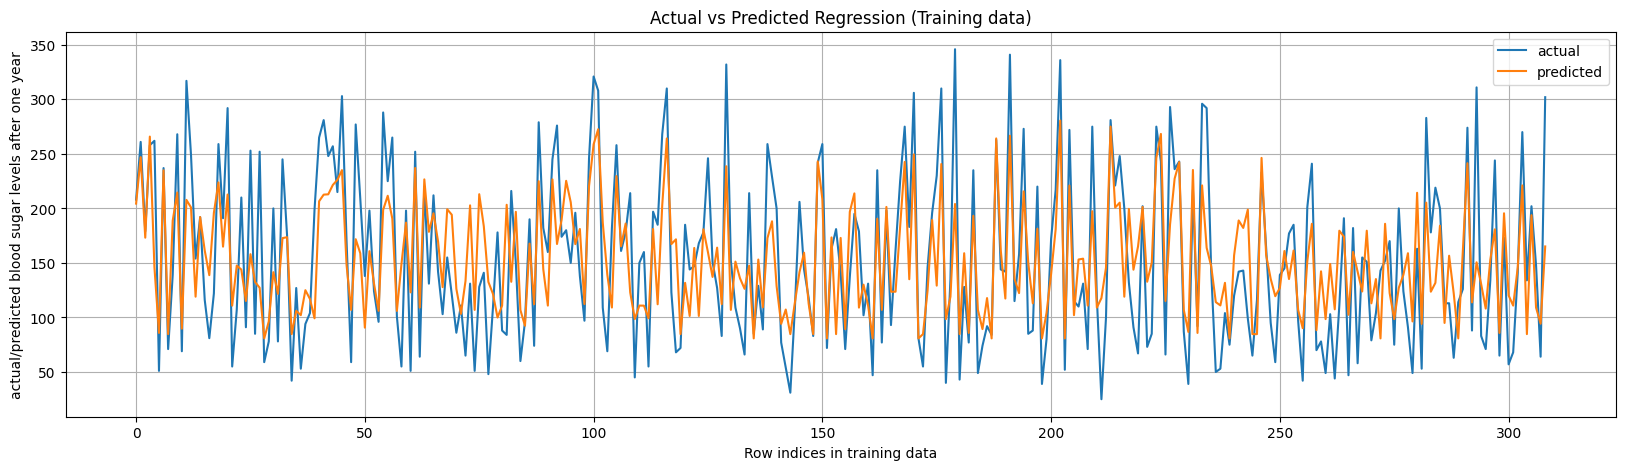

In [58]:
plt.figure(figsize=(20, 5))
plt.plot(training_performance_df["actual"].values, label="actual")
plt.plot(training_performance_df["predicted"].values, label="predicted")
plt.grid()
plt.legend()
plt.xlabel("Row indices in training data")
plt.ylabel("actual/predicted blood sugar levels after one year")
plt.title("Actual vs Predicted Regression (Training data)")
plt.show()

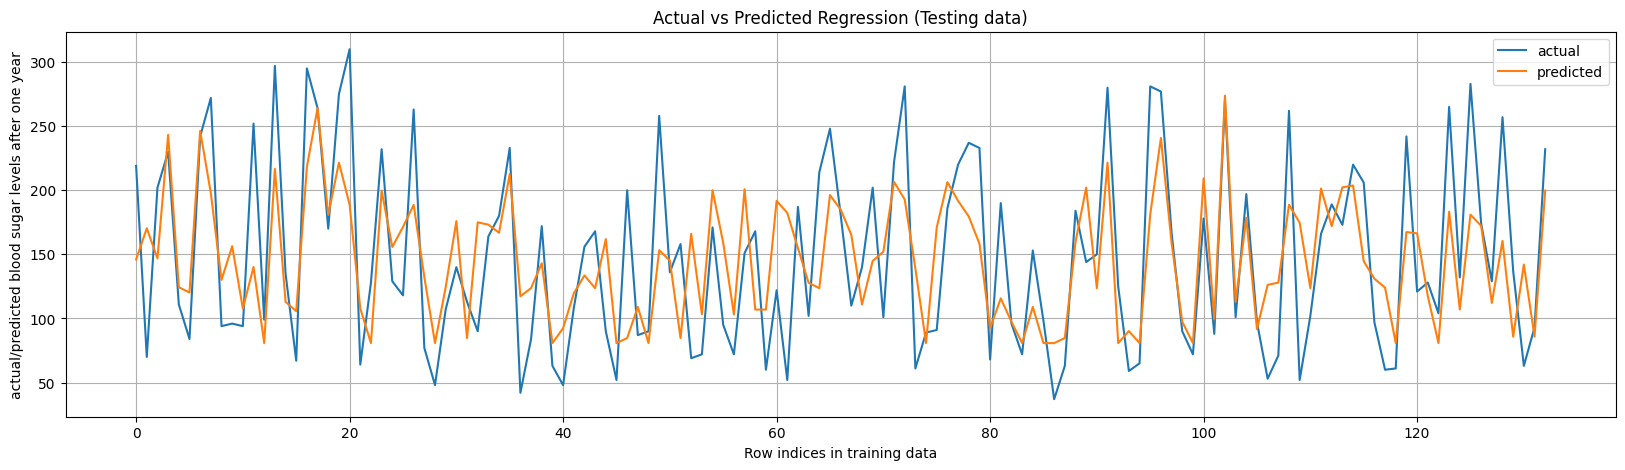

In [60]:
plt.figure(figsize=(20, 5))
plt.plot(testing_performance_df["actual"].values, label="actual")
plt.plot(testing_performance_df["predicted"].values, label="predicted")
plt.grid()
plt.legend()
plt.xlabel("Row indices in training data")
plt.ylabel("actual/predicted blood sugar levels after one year")
plt.title("Actual vs Predicted Regression (Testing data)")
plt.show()

In [65]:
training_mape = mean_absolute_percentage_error(
    training_performance_df["actual"].values,
    training_performance_df["predicted"].values
)
test_mape = mean_absolute_percentage_error(
    testing_performance_df["actual"].values,
    testing_performance_df["predicted"].values
)
print("Training MAPE:", training_mape)
print("Testing MAPE:", test_mape)

Training MAPE: 0.3799444071555148
Testing MAPE: 0.3845132706097639


In [67]:
training_r2 = r2_score(
    training_performance_df["actual"].values,
    training_performance_df["predicted"].values
)
test_r2 = r2_score(
    testing_performance_df["actual"].values,
    testing_performance_df["predicted"].values
)
print("Training Rsquare:", training_r2)
print("Testing Rsquare:", test_r2)

Training Rsquare: 0.5667549372228491
Testing Rsquare: 0.4771249222809174


#Classification

In [68]:
X = diabetes_df.loc[:, ['age', 'sex', 'bmi', 'bp', 'total serum cholesterol', 'LDL cholestrol',
       'HDL cholestrol', 'total cholesterol / HDL',
       'log of serum triglycerides level', 'blood sugar levels']]
y = diabetes_df.loc[:, ["is_abnormal"]]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [71]:
rf_classifier = RandomForestClassifier(random_state=0, n_jobs=-1)

In [72]:
param_grid = {
    "n_estimators": list(range(100, 300, 50)),
    "max_depth": list(range(2, 9)),
    "max_features": [0.9, 0.7, 0.6]
}

In [73]:
rf_grid_model = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    n_jobs=-1,
    cv=3
)

In [74]:
rf_grid_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_features': [0.9, 0.7, 0.6],
                         'n_estimators': [100, 150, 200, 250]})

In [75]:
rf_grid_model.best_params_

{'max_depth': 3, 'max_features': 0.9, 'n_estimators': 100}

In [76]:
pred_y_train = rf_grid_model.predict(X_train)

In [77]:
pred_y_test = rf_grid_model.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_train, pred_y_train))

              precision    recall  f1-score   support

           0       1.00      0.09      0.17        64
           1       0.81      1.00      0.89       245

    accuracy                           0.81       309
   macro avg       0.90      0.55      0.53       309
weighted avg       0.85      0.81      0.74       309



In [79]:
print(classification_report(y_test, pred_y_test))

              precision    recall  f1-score   support

           0       1.00      0.03      0.06        34
           1       0.75      1.00      0.86        99

    accuracy                           0.75       133
   macro avg       0.88      0.51      0.46       133
weighted avg       0.81      0.75      0.65       133

